In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [24]:
df= pd.read_csv(r"C:\Users\Karen\Desktop\archive (2)\petroleo.csv")
df

,Continent,Country,Trade Value,Year,Action
0,Africa,Angola,2.767000e+10,2021,Export
1,Africa,Botswana,2.055000e+03,2021,Export
2,Africa,Cote d'Ivoire,4.447282e+08,2021,Export
3,Africa,Cameroon,1.865465e+09,2021,Export
4,Africa,Democratic Republic of the Congo,5.815086e+08,2021,Export
...,...,...,...,...,...
7920,South America,Peru,2.925830e+08,1995,Import
7921,South America,Paraguay,2.829010e+07,1995,Import
7922,South America,Suriname,1.830000e+07,1995,Import
7923,South America,Uruguay,1.606507e+08,1995,Import


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7925 entries, 0 to 7924
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Continent    7925 non-null   object 
 1   Country      7925 non-null   object 
 2   Trade Value  7925 non-null   float64
 3   Year         7925 non-null   int64  
 4   Action       7925 non-null   object 
dtypes: float64(1), int64(1), object(3)
memory usage: 309.7+ KB


# Perform data wrangling

In [28]:
df.isnull().sum()

Continent      0
Country        0
Trade Value    0
Year           0
Action         0
dtype: int64

In [30]:
df.describe()

,Trade Value,Year
count,7.925000e+03,7925.000000
mean,5.365169e+09,2008.589148
std,1.940226e+10,7.569435
min,1.000000e+00,1995.000000
25%,1.416080e+05,2002.000000
50%,8.549274e+07,2009.000000
75%,1.828030e+09,2015.000000
max,3.283380e+11,2021.000000


In [47]:
africa = df[df["Country"] == "Angola"]
angola=africa[africa["Action"]=="Export"]
#angola

In [79]:
angola_precios=angola["Trade Value"]
#angola_precios

In [112]:
america=df[df["Country"]=="Mexico"]
mexico=america[america["Action"]=="Export"]
#mexico

In [77]:
mexico_precio=mexico["Trade Value"]
#mexico_precio

# Perform exploratory data analysis (EDA)

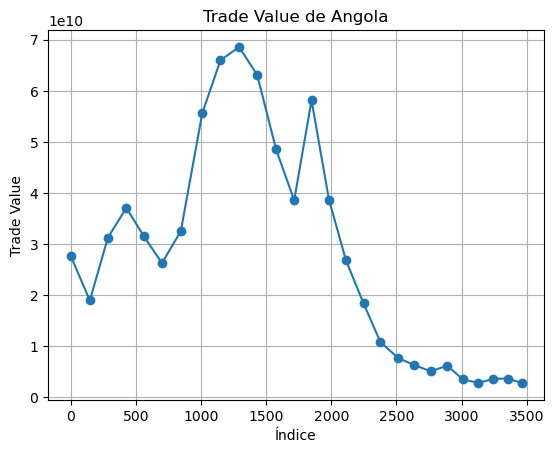

In [75]:
plt.plot(angola_precios, marker="o")
plt.title("Trade Value de Angola")
plt.xlabel("Índice")
plt.ylabel("Trade Value")
plt.grid(True)
plt.show()

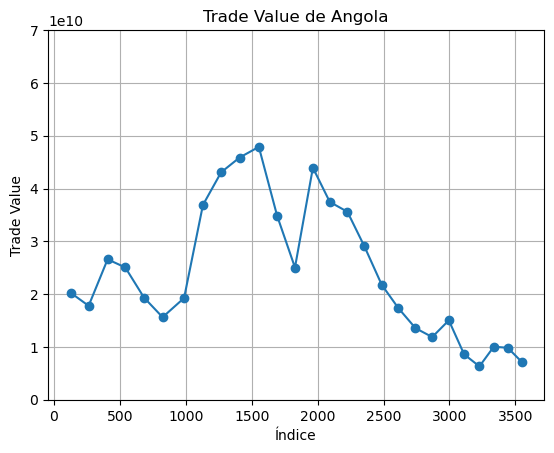

In [108]:
plt.plot(mexico_precio, marker="o")
plt.title("Trade Value de Angola")
plt.xlabel("Índice")
plt.ylabel("Trade Value")
plt.ylim(0, 7e10)
plt.grid(True)
plt.show()

# Perform interactive visual analytics using Folium and Plotly Dash

In [114]:
pip install folium

In [116]:
import folium

# Crear un mapa centrado en el mundo
m = folium.Map(location=[0, 0], zoom_start=2)

# Agregar un marcador para Angola
folium.Marker(
    location=[-11.2027, 17.8739],  # Coordenadas de Angola
    popup="Exportación de Angola",
    tooltip=f"Trade Value: {angola_precios.sum()}"
).add_to(m)

# Agregar un marcador para México
folium.Marker(
    location=[23.6345, -102.5528],  # Coordenadas de México
    popup="Exportación de México",
    tooltip=f"Trade Value: {mexico_precio.sum()}"
).add_to(m)

# Mostrar el mapa
m

In [118]:
pip install dash

In [122]:
from dash import Dash, dcc, html, Input, Output
import plotly.express as px
import pandas as pd

# Crear la app Dash
app = Dash(__name__)

# Cargar los datos
mexico = pd.read_csv(r"C:\Users\Karen\Desktop\archive (2)\petroleo.csv")
angola = mexico[mexico["Country"] == "Angola"]
mexico = mexico[mexico["Country"] == "Mexico"]

# Crear gráficos usando Plotly Express
fig_mexico = px.line(mexico, x="Year", y="Trade Value", title="Exportaciones de México")
fig_angola = px.line(angola, x="Year", y="Trade Value", title="Exportaciones de Angola")

# Diseño de la app
app.layout = html.Div([
    html.H1("Visualización Interactiva de Exportaciones", style={'textAlign': 'center'}),
    
    # Dropdown para seleccionar el país
    dcc.Dropdown(
        id='dropdown-country',
        options=[
            {'label': 'México', 'value': 'Mexico'},
            {'label': 'Angola', 'value': 'Angola'}
        ],
        value='Mexico',  # Valor inicial
        clearable=False,
        style={'width': '50%', 'margin': '0 auto'}
    ),
    
    # Componente para mostrar el gráfico
    dcc.Graph(id='line-chart')
])

# Callback para actualizar el gráfico basado en la selección del dropdown
@app.callback(
    Output('line-chart', 'figure'),
    [Input('dropdown-country', 'value')]
)
def update_chart(selected_country):
    if selected_country == 'Mexico':
        return fig_mexico
    elif selected_country == 'Angola':
        return fig_angola

# Ejecutar la app
if __name__ == '__main__':
    app.run_server(debug=True)

## Perform predictive analysis using classification models

In [134]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Convertir las variables categóricas usando One-Hot Encoding
df_encoded = pd.get_dummies(df, columns=['Continent', 'Country', 'Action'], drop_first=True)

# Ver las primeras filas para confirmar que se realizó la codificación correctamente
print(df_encoded.head())

    Trade Value  Year  Continent_Antarctica  Continent_Asia  Continent_Europe  \
0  2.767000e+10  2021                 False           False             False   
1  2.055000e+03  2021                 False           False             False   
2  4.447282e+08  2021                 False           False             False   
3  1.865465e+09  2021                 False           False             False   
4  5.815086e+08  2021                 False           False             False   

   Continent_North America  Continent_Oceania  Continent_South America  \
0                    False              False                    False   
1                    False              False                    False   
2                    False              False                    False   
3                    False              False                    False   
4                    False              False                    False   

   Country_Albania  Country_Algeria  ...  Country_Uzbekistan  Countr

In [136]:
# Crear la variable objetivo 'Trade Category' basada en la mediana del 'Trade Value'
threshold = df['Trade Value'].median()  # Usamos la mediana como umbral

# Clasificamos los valores de 'Trade Value' como 'Alto' (1) o 'Bajo' (0)
df_encoded['Trade Category'] = df_encoded['Trade Value'].apply(lambda x: 1 if x >= threshold else 0)

# Ver las primeras filas del DataFrame
print(df_encoded[['Trade Value', 'Trade Category']].head())

    Trade Value  Trade Category
0  2.767000e+10               1
1  2.055000e+03               0
2  4.447282e+08               1
3  1.865465e+09               1
4  5.815086e+08               1


In [138]:
# Las características (X) serán todas las columnas excepto 'Trade Value' y 'Trade Category'
X = df_encoded.drop(columns=['Trade Value', 'Trade Category'])

# La variable objetivo (y) será la columna 'Trade Category'
y = df_encoded['Trade Category']

# Dividir en datos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Verificar las primeras filas de X_train y y_train
print(X_train.head())

      Year  Continent_Antarctica  Continent_Asia  Continent_Europe  \
6604  2004                 False           False             False   
6146  2006                 False           False             False   
2488  2004                 False           False             False   
1611  2010                 False            True             False   
4207  2018                 False           False             False   

      Continent_North America  Continent_Oceania  Continent_South America  \
6604                     True              False                    False   
6146                    False              False                    False   
2488                     True              False                    False   
1611                    False              False                    False   
4207                    False               True                    False   

      Country_Albania  Country_Algeria  Country_American Samoa  ...  \
6604            False            False       

In [155]:
from sklearn.preprocessing import StandardScaler

# Escalar las características
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Entrenar el modelo con los datos escalados
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

# Evaluar el modelo
y_pred = model.predict(X_test_scaled)

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

# Obtener el Classification Report
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

# Mostrar la Confusion Matrix
print(f'Confusion Matrix:\n{confusion_matrix(y_test, y_pred)}')

Accuracy: 0.7535744322960471
Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.72      0.74      1167
           1       0.74      0.79      0.76      1211

    accuracy                           0.75      2378
   macro avg       0.75      0.75      0.75      2378
weighted avg       0.75      0.75      0.75      2378

Confusion Matrix:
[[839 328]
 [258 953]]


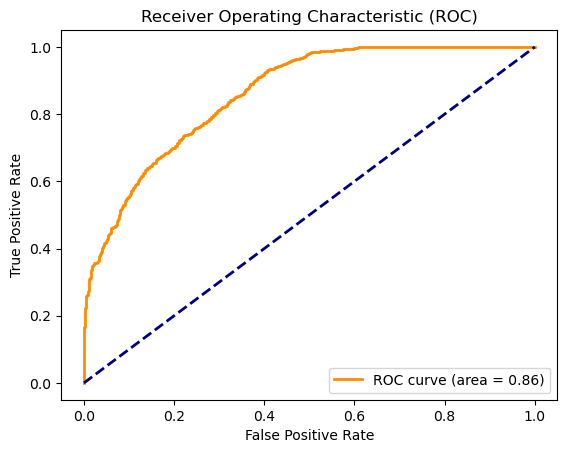

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calcular la probabilidad de la clase positiva (1: "Alto")
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Calcular la curva ROC
fpr, tpr, _ = roc_curve(y_test, y_prob)

# Calcular el área bajo la curva (AUC)
roc_auc = auc(fpr, tpr)

# Graficar la curva ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

In [163]:
df['Predicción'] = y_full_pred

# Ver cómo se distribuyen las predicciones en el dataset
pred_dist = df['Predicción'].value_counts()
print(pred_dist)

# Ver cómo las predicciones coinciden con las características
print(df[['Country', 'Year', 'Trade Value', 'Predicción']].head())

Predicción
1    4296
0    3629
Name: count, dtype: int64
                            Country  Year   Trade Value  Predicción
0                            Angola  2021  2.767000e+10           1
1                          Botswana  2021  2.055000e+03           0
2                     Cote d'Ivoire  2021  4.447282e+08           1
3                          Cameroon  2021  1.865465e+09           1
4  Democratic Republic of the Congo  2021  5.815086e+08           0
